In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math

In [2]:
%matplotlib inline

# A

$$ R_n=aY_n+b \\
Y_n\sim B(n,p) \\
E(R_n)=E(aY_n+b)=aE(Y_n)+b\\
E(Y_n)=np\\
E(R_n)=anp+b\\
Var(R_n)=a^2np(1-p)
$$

In [3]:
def mean(n,p, a, b):  
    return a*n*p + b
def variance(n,p): 
    return a*a*n*p*(1-p)

# B

$$\tilde{p}=\frac{(1+r)-d}{u-d}$$

In [4]:
def p_tilde(n,r,d,u): 
    p = ((1+r)-d)/(u-d)
    return p 

# C

In [6]:
def spot_calc(path,u,d):
    S = np.zeros(len(path)+1)
    S[0]=1
    for i in range(len(path)): 
        if path[i] == 1: 
            S[i+1]=S[i]*u 
        else: 
            S[i+1]=S[i]*d
    return S

def backwards_hedge(spot_path,option_path):
    delta_hedge=np.zeros(option_path.shape)
    for i in range(option_value.shape[1]-1,1,-1):
        delta_hedge[i]=(option_path[i]/(1+r)-option_path[i-1])/(spot_path[i]/(1+r)-spot_path[i-1])
    return delta_hedge

def replicating_port(delta_zero,S_zero,V_zero):
    Xo = delta_zero*S_zero + (V_zero - delta_zero*S_zero)
    return Xo 

# D

In [7]:
def option_calc(S,K,call=True):
    V = np.zeros(len(S))
    if call: 
        for i in range(len(S)):
            V[i] = max(0,S[i]- K) 
    else: 
        for i in range(len(S)):
            V[i] = max(0, K - S[i]) 
    return V      

# E

In [33]:
def MonteCarlo(N,p,num_sim): 
    paths = []
    for i in range(N): 
        sim = np.random.binomial(1,p, num_sim)
        paths.append(sim)
    paths=(np.array(paths)).T
    return paths

def OptionSimulate(p,u,d,N,L,K): 
    paths =  MonteCarlo(N,p,L)
    Vs_call=[]
    Vs_put=[]
    for i in range(L): 
        S = spot_calc(paths[i],u,d)
        Vs_call.append(option_calc(S,K))
        Vs_put.append(option_calc(S,K, call=False))
    ttlc = 0 
    ttlp = 0
    for j in range(L): 
        ttlc = ttlc + Vs_call[j][N-1]
        ttlp = ttlp + Vs_put[j][N-1]
    E_call = ttlc/L 
    E_put = ttlp/L
    return E_call,E_put

In [34]:
r = 0.003 
d = 1.002
u = 1.005
N = 100 
p1 = 0.4 
p2 = 0.6 
S_zero = 1 
L = 1000
p_neutral = p_tilde(N,r,d,u)
a = math.log(u/d)
b = N*math.log(d)
K1 = S_zero*np.exp(mean(N,p1,a,b))
K2 = S_zero*np.exp(mean(N,p2,a,b))
K_neutral = S_zero*np.exp(mean(N,p_neutral,a,b))

C1,P1 = OptionSimulate(p1,u,d,N,L,K1) 
C2,P2 = OptionSimulate(p2,u,d,N,L,K2) 


Some math explaining what is happening above:
$$ 
\begin{aligned}
R_n &=log(u^k)+log(d^{n-k}) \\
&=k log(u)+(n-k)log(d) \\
&=k(log(u)-log(d))+n log(d) \\
&= k log\left(\frac{u}{d}\right)+n log(d)
\end{aligned}
$$

So then: 
$$
\begin{aligned}
E(R_n)&=(np)log\left(\frac{u}{d}\right)+n log(d) \\
Var(R_n)&=\left(log\left(\frac{u}{d}\right)\right)^2 * np(1-p) \\
\end{aligned}
$$

In [35]:
print(C1,P1)
print(C2,P2)

0.00578005718226 0.0102095841593
0.00637937160496 0.0106943203986


# F

In [16]:
def value_risk_neutral(p,u,d,N,L,K): 
    paths =  MonteCarlo(N,p,L)
    Vs_call=[]
    Vs_put=[]
    for i in range(L): 
        S = spot_calc(paths[i],u,d)
        Vs_call.append(option_calc(S,K))
        Vs_put.append(option_calc(S,K,call=False))
    ttlc = 0 
    ttlp = 0
    for j in range(L): 
        ttlc = ttlc + Vs_call[j][N-1]/((1+r)**N)
        ttlp = ttlp + Vs_put[j][N-1]/((1+r)**N)
    E_call = ttlc/L 
    E_put = ttlp/L
    
    return E_call,E_put

In [18]:
C1,P1 = value_risk_neutral(p1,u,d,N,L,K1) 
C2,P2 = value_risk_neutral(p2,u,d,N,L,K2) 

In [19]:
print(C1,P1)
print(C2,P2)

0.00409984468354 0.0079184008596
0.00462208296425 0.00829138612218


# G

In [20]:
p=0.5
path=MonteCarlo(100,p,3)

In [21]:
spot_price=np.zeros((path.shape[0],path.shape[1]+1))

In [22]:
for i in range(len(path)):
    spot_price[i]=spot_calc(path[i],u,d)

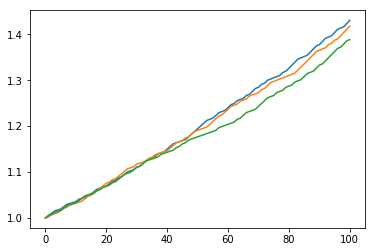

In [23]:
plt.plot(spot_price.T)

In [24]:
option_value=np.zeros((spot_price.shape))
for i in range(spot_price.shape[0]):
    option_value[i]=option_calc(spot_price[i],K1)

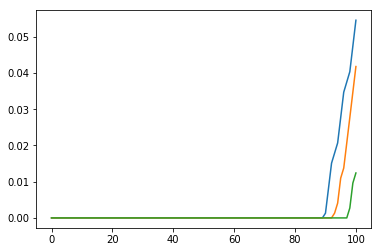

In [25]:
plt.plot(option_value.T)

In [27]:
delta_hedge=np.zeros((spot_price.shape))
for i in range(spot_price.shape[0]):
    delta_hedge[i]=backwards_hedge(spot_price[i],option_value[i])

In [28]:
a =np.zeros(len(spot_price[0]))
b = np.zeros(spot_price[0].shape)

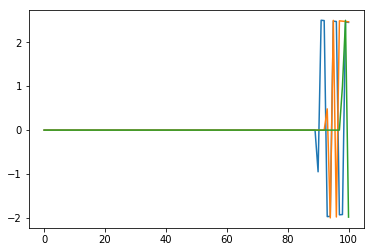

In [29]:
plt.plot(delta_hedge.T)

# H
Option values printed above.